prepending an affine transformation to data transform of an image,从而允许操作图片的方向，这是一个转换链式的一个操作。


In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.transforms as mtransforms

c:\program files (x86)\python1\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in power
  """
c:\program files (x86)\python1\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in power
  """
c:\program files (x86)\python1\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in exp
  """


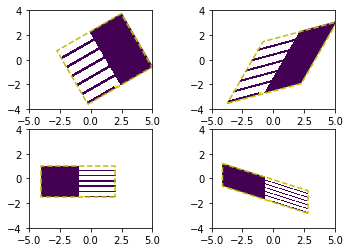

In [7]:
def get_image():
    delta=0.25  # 间隔差值
    x=y=np.arange(-3.0,3.0,delta)
    X,Y=np.meshgrid(x,y)
    Z1=np.exp(-X**-Y**2)
    Z2=np.exp(-(X-1)**2-(Y-1)**2)
    Z=Z1-Z2
    return Z
def do_plot(ax,Z,transform):
    im=ax.imshow(Z,
                interpolation="none",
                origin="lower",
                extent=[-2,4,-3,2],clip_on=True)
    trans_data=transform+ax.transData
    im.set_transform(trans_data)
    
    # 展示图片的程度
    x1, x2, y1, y2 = im.get_extent()
    ax.plot([x1, x2, x2, x1, x1], [y1, y1, y2, y2, y1], "y--",
            transform=trans_data)
    ax.set_xlim(-5, 5)
    ax.set_ylim(-4, 4)

# prepare image and figure
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
Z = get_image()

# image rotation
do_plot(ax1, Z, mtransforms.Affine2D().rotate_deg(30))

# image skew
do_plot(ax2, Z, mtransforms.Affine2D().skew_deg(30, 15))

# scale and reflection
do_plot(ax3, Z, mtransforms.Affine2D().scale(-1, .5))

# everything and a translation
do_plot(ax4, Z, mtransforms.Affine2D().
        rotate_deg(30).skew_deg(30, 15).scale(-1, .5).translate(.5, -1))

plt.show()   
    

[-3.   -2.75 -2.5  -2.25 -2.   -1.75 -1.5  -1.25 -1.   -0.75 -0.5  -0.25
  0.    0.25  0.5   0.75  1.    1.25  1.5   1.75  2.    2.25  2.5   2.75]


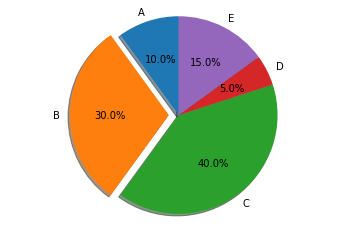

In [18]:
x=[10,30,40,5,15]
labels=list("ABCDE")
fig,ax=plt.subplots()
explode=[0,0.1,0,0,0]
ax.pie(x,autopct="%1.1f%%",explode=explode,shadow=True,
      startangle=90,
      labels=labels)  # 在片左边的地方显示
ax.axis("equal")
plt.show()

### Rendering math eaqution using Tex


Text(0.5, 1.0, '\\TeX\\ is Number $ \\sum_{n=1}^\\infty\\frac{-e^{i\\pi}}{2^n}$!')

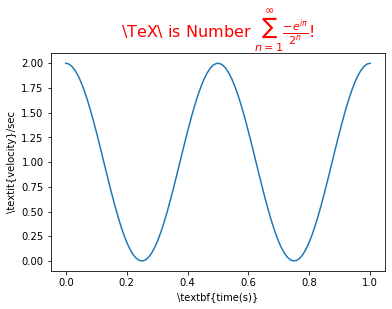

In [29]:
t=np.linspace(0.0,1.0,100)
s=np.cos(4*np.pi*t)+1
fig,ax=plt.subplots()
ax.plot(t,s)
ax.set_xlabel(r"\textbf{time(s)}")
ax.set_ylabel(r"\textit{velocity}/sec")
ax.set_title(r'\TeX\ is Number $ \sum_{n=1}^\infty'
             r'\frac{-e^{i\pi}}{2^n}$!', fontsize=16, color='r')
# r的意思是全部不转换，原汁原味的保留